## Welcome!
Please start by running the first cell to import all the libraries for this script. Proceed to run all functions until the next markdown cell!

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

from os import listdir, getcwd, chdir
from os.path import isfile, join
from sklearn import linear_model

In [2]:
def get_experiment(date,donor,DIV,stimulus,level):
    '''Generates a string for the Traj csv folder you're working in.
    This follows the naming convention I use, but you can omit this function and
    code in the name of the Traj csv folder (second to last cell).
    '''
    experiment=date+'_'+donor+'_'+DIV+'_'+stimulus+'_'+level #Title of the Traj_csv folder without '_Traj_csv'
    
    return experiment

In [3]:
def get_path(model,experiment):
    '''Returns the datapath in your directory corresponding to the Traj csv folder.
    '''
    data_path=f'/Users/phuongnguyen/Desktop/diff_classifier_PN/notebooks/development/QD-BEV MPT/{model} MPT/{experiment}_Traj_csv/'

    return data_path

In [4]:
def get_csvs(data_path,filetype):
    '''Returns the master list of csv files in the Traj csv folder, geoMean or geoSEM files depending on user input.
    '''
    geo_list=[j for j in listdir(data_path) if isfile(join(data_path, j)) and filetype in j]
    
    return geo_list

In [5]:
def get_geo_dict(geo_list,doses):
    '''Converts the list of csv files into a dictionary split by dose (50nM ROT, 0.5h OGD, etc.)
    '''
    geo_dict={}
    
    for dose in doses:
        geo_dict[dose]=[]
        
    for dose in doses:
        geo_dose=[file for file in geo_list if dose in file]
        geo_dict[dose].append(geo_dose)
    
    return geo_dict

In [13]:
def get_geo_df(filetype,doses,timepoints,experiment): #BB took out model in function call
    '''Constructs a dataframe of MSD values for every combination of dose/time.
    If there are multiple csv files for a single dose/time, the arithmatic mean is computed.
    The user has the option to generate dataframes for the MSD values (geoMean) or the standard
    error of the mean (geoSEM) from MPT segmenting. 
    '''
    df_list=[]   
    data_path='/Users/phuongnguyen/Desktop/diff_classifier_PN/notebooks/development/QD-BEV MPT/Compiled_Data_Healthy_OGD/'

        
    if filetype=='geomean':
        geo_list=get_csvs(data_path,filetype)
        geo_dict=get_geo_dict(geo_list,doses)
    
        for dose in doses: 
            for time in timepoints:
                csv_list=[file for file in geo_dict[dose][0] if dose in file and time in file]
                temp_csv_df=[]

                 
                for csv in csv_list:
                    if sum(dose and time in csv for csv in csv_list)==1: 
                        temp_csv_df.append(pd.read_csv(data_path+csv))
                        csv_df=pd.concat(temp_csv_df,axis=1)
                        csv_df[dose+"_"+time]=np.exp(csv_df.mean(axis=1))
                        geo_df=csv_df.drop(columns=csv_df.columns[:1],axis=1)
                        df_list.append(geo_df)
                
                    if sum(dose and time in csv for csv in csv_list)>1:
                        ndrop=sum(dose and time in csv for csv in csv_list)
                        temp_csv_df.append(pd.read_csv(data_path+csv))
                        csv_df=pd.concat(temp_csv_df,axis=1)
                        csv_df[dose+"_"+time]=np.exp(csv_df.mean(axis=1))
                        geo_df=csv_df.drop(columns=csv_df.columns[:ndrop],axis=1)
                        df_list.append(geo_df)
            print(df_list)
            geo_df=pd.concat(df_list,axis=1)
        
    if filetype =='geoSEM':
        geo_list=get_csvs(data_path,filetype)
        geo_dict=get_geo_dict(geo_list,doses)
        
        for dose in doses: 
            for time in timepoints:
                csv_list=[file for file in geo_dict[dose][0] if dose in file and time in file]
                temp_csv_df=[]
                
                for csv in csv_list:
                    if sum(dose and time in csv for csv in csv_list)==1:
                        temp_csv_df.append(pd.read_csv(data_path+csv))
                        csv_df=pd.concat(temp_csv_df,axis=1)
                        csv_df[dose+"_"+time]=csv_df.mean(axis=1)
                        geo_df=csv_df.drop(columns=csv_df.columns[:1],axis=1)
                        df_list.append(geo_df)
                    
                    if sum(dose and time in csv for csv in csv_list)>1:
                        ndrop=sum(dose and time in csv for csv in csv_list)
                        temp_csv_df.append(pd.read_csv(data_path+csv))
                        csv_df=pd.concat(temp_csv_df,axis=1)
                        csv_df[dose+"_"+time]=csv_df.mean(axis=1)
                        geo_df=csv_df.drop(columns=csv_df.columns[:ndrop],axis=1)
                        df_list.append(geo_df)
    
            geo_df=pd.concat(df_list,axis=1)
            geo_df.drop
        
    return geo_df

In [14]:
def get_df_dose_list(doses,geo_df):
    df_dose_list = []
    
    for dose in doses:
        dose_df = pd.DataFrame()
        dose_cols = [col for col in geo_df.columns if dose in col]
        dose_df = geo_df.filter(dose_cols, axis=1)
        df_dose_list.append(dose_df)
        
    return df_dose_list

In [18]:
def msd_viz(doses,geomean_df,df_dose_list):
    count = 0
    
    if len(doses) == 1:
        tau = geomean_df.index.values / 651
        fig, ax = plt.subplots(figsize=(5,5))
        plt.rcParams.update({'font.family':'helvetica'})
        handles = list(geomean_df.columns)
        #labels = [handle.split(stimulus+'_')[1] for handle in handles] # this wont work
    
        for handle in handles:
            ax.loglog(tau [0:70],geomean_df[handle][0:70]) #Can take out the 0:70 part to get the whole graph
            ax.set_xlabel('Lag time (s)',fontsize=16)
            ax.set_ylabel('Mean-squared displacement (μ$m^2$)',fontsize=16)
            #ax.legend(labels,loc='upper left') #this wont either
            ax.set_xlim([0.002, 0.05])
            ax.set_ylim([0.0009,1.3])
            #axes[c].set_title(f'\n{doses[c]}\n', fontsize=16)
        ax.legend(handles)

         
    else:                
        tau = geomean_df.index.values/651
        fig, axes = plt.subplots(nrows=1, ncols=len(doses),figsize=(12,6))
        plt.rcParams.update({'font.family':'helvetica'})
        count=0
        
        for c in np.arange(0,len(doses)):
            handles = list(df_dose_list[c].columns)
            times = []
            handles = list(df_dose_list[c].columns)
            #labels = [handle.split(stimulus+'_')[1] for handle in handles]
            axes[c].loglog(tau[0:70],df_dose_list[count][0:70])
            axes[c].set_xlabel('\nLag time (s)',fontsize=16)
            #axes[c].legend(labels,loc='best')
            axes[c].set_xlim([0.002, 0.02])
            axes[c].set_ylim([0.0009,10])
            axes[c].set_title(f'\n{doses[c]}\n', fontsize=16)
    
            if c == 0:
                axes[c].set_ylabel('Mean-squared displacement (μ$m^2$)',fontsize=16)
    
            count+=1
    return

## Input experiment/directory info and make MSD plots!

Input the components of your trajectory csv folder. Using my folder "102722_P10F_4DIV_HYase_35umL_Traj_csv" as an example. If your naming convention follows a different format, simply comment out line 6 and hard-code the name of your trajectory csv folder.

Doses were written for ROT data but can correspond to any set of stimuli, however this is named in your traj csv files.

In this current version I don't have the error shading functionality built in yet, but working on that!

In [19]:
#geomean_040623_P10M_4DIV_100X_OGD_Striatum_Slice2_Video3.csv

date='040623'
donor='P10F'
DIV='4DIV'
stimulus='100X_OGD'
level='Striatum'
experiment = get_experiment(date,donor,DIV,stimulus,level)
#experiment = 'your_traj_folder'

doses = ['OGD']
timepoints = ['Cortex','Striatum']
#doses=['HYase_35UmL','HYase_NT'] #Unique experimental condition
#timepoints=['_0m','10m','20m','30m','40m','50m','60m'] #Time points taken in study

#data_path=get_path(model,experiment) #Data path of traj csv folder
data_path='/Users/phuongnguyen/Desktop/diff_classifier_PN/notebooks/development/QD-BEV MPT/Compiled_Data_Healthy_OGD/'

geo_list=get_csvs(data_path,'geomean') #list of csvs in folder containing raw MSD values
geo_dict=get_geo_dict(geo_list,doses) #dictionary (by experimental condition) of csvs in folder
print(geo_dict)

geomean_df=get_geo_df('geomean',doses,timepoints,experiment) #Dataframe of all MSD values by condition/timepoint
#hardcoded directory in geomean_df and geo_list
print(geomean_df)
df_dose_list=get_df_dose_list(doses,geomean_df) #list of the column headers in the geoMean_df for plot labeling

{'OGD': [['geomean_100X_OGD_Cortex_Slice2_Video1.csv', 'geomean_100X_OGD_Cortex_Slice2_Video3.csv', 'geomean_100X_OGD_Cortex_Slice2_Video2.csv', 'geomean_040623_P10M_4DIV_100X_OGD_Striatum_Slice2_Video3.csv', 'geomean_100X_OGD_Striatum_Slice2_Video1.csv', 'geomean_100X_OGD_Striatum_Slice3_Video1.csv', 'geomean_100X_OGD_Striatum_Slice3_Video2.csv', 'geomean_100X_OGD_Striatum_Slice3_Video3.csv', 'geomean_100X_OGD_Striatum_Slice1_Video1.csv', 'geomean_60X_OGD_Cortex_Slice1_Video2.csv', 'geomean_100X_OGD_Striatum_Slice1_Video3.csv', 'geomean_100X_OGD_Striatum_Slice1_Video2.csv', 'geomean_60X_OGD_Cortex_Slice1_Video1.csv', 'geomean_100X_OGD_Striatum_Slice1_Video5.csv']]}
[Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74

## Plot!

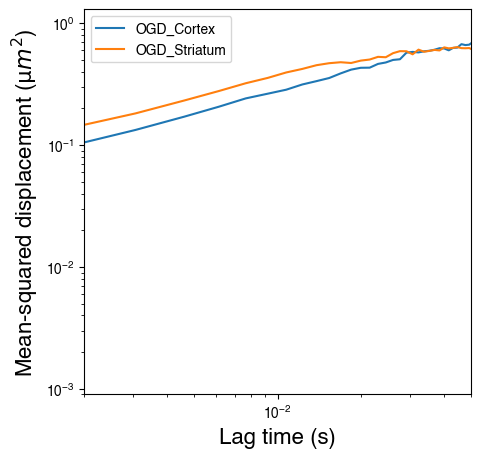

In [20]:
msd_viz(doses,geomean_df,df_dose_list)

In [79]:
geomean_df.columns

Index(['OGD_Cortex', 'OGD_Striatum'], dtype='object')

In [73]:
geo_dict=get_geo_dict(geo_list,doses) #dictionary (by experimental condition) of csvs in folder

In [74]:
geo_dict

{'Healthy': [['geomean_60X_Healthy_Cortex_Video1.csv',
   'geomean_100X_Healthy_Cortex_Slice2_Video4.csv',
   'geomean_100X_Healthy_Striatum_Slice1_Video4.csv',
   'geomean_100X_Healthy_Striatum_Slice1_Video1.csv',
   'geomean_100X_Healthy_Striatum_Slice1_Video3.csv',
   'geomean_100X_Healthy_Striatum_Slice1_Video2.csv',
   'geomean_100X_Healthy_Striatum_Slice2_Video1.csv',
   'geomean_100X_Healthy_Cortex_Slice1_Video1.csv',
   'geomean_100X_Healthy_Striatum_Slice2_Video2.csv',
   'geomean_100X_Healthy_Striatum_Slice2_Video3.csv',
   'geomean_60X_Healthy_Striatum_Slice2_Video1.csv']],
 'OGD': [['geomean_100X_OGD_Cortex_Slice2_Video1.csv',
   'geomean_100X_OGD_Cortex_Slice2_Video3.csv',
   'geomean_100X_OGD_Cortex_Slice2_Video2.csv',
   'geomean_040623_P10M_4DIV_100X_OGD_Striatum_Slice2_Video3.csv',
   'geomean_100X_OGD_Striatum_Slice2_Video1.csv',
   'geomean_100X_OGD_Striatum_Slice3_Video1.csv',
   'geomean_100X_OGD_Striatum_Slice3_Video2.csv',
   'geomean_100X_OGD_Striatum_Slice3_Vid

In [75]:
geo_list

['geomean_60X_Healthy_Cortex_Video1.csv',
 'geomean_100X_OGD_Cortex_Slice2_Video1.csv',
 'geomean_100X_OGD_Cortex_Slice2_Video3.csv',
 'geomean_100X_OGD_Cortex_Slice2_Video2.csv',
 'geomean_040623_P10M_4DIV_100X_OGD_Striatum_Slice2_Video3.csv',
 'geomean_100X_OGD_Striatum_Slice2_Video1.csv',
 'geomean_100X_Healthy_Cortex_Slice2_Video4.csv',
 'geomean_100X_Healthy_Striatum_Slice1_Video4.csv',
 'geomean_100X_Healthy_Striatum_Slice1_Video1.csv',
 'geomean_100X_Healthy_Striatum_Slice1_Video3.csv',
 'geomean_100X_Healthy_Striatum_Slice1_Video2.csv',
 'geomean_100X_Healthy_Striatum_Slice2_Video1.csv',
 'geomean_100X_OGD_Striatum_Slice3_Video1.csv',
 'geomean_100X_Healthy_Cortex_Slice1_Video1.csv',
 'geomean_100X_OGD_Striatum_Slice3_Video2.csv',
 'geomean_100X_Healthy_Striatum_Slice2_Video2.csv',
 'geomean_100X_Healthy_Striatum_Slice2_Video3.csv',
 'geomean_100X_OGD_Striatum_Slice3_Video3.csv',
 'geomean_60X_Healthy_Striatum_Slice2_Video1.csv',
 'geomean_100X_OGD_Striatum_Slice1_Video1.csv',


In [76]:
get_csvs(data_path,'geomean')

['geomean_60X_Healthy_Cortex_Video1.csv',
 'geomean_100X_OGD_Cortex_Slice2_Video1.csv',
 'geomean_100X_OGD_Cortex_Slice2_Video3.csv',
 'geomean_100X_OGD_Cortex_Slice2_Video2.csv',
 'geomean_040623_P10M_4DIV_100X_OGD_Striatum_Slice2_Video3.csv',
 'geomean_100X_OGD_Striatum_Slice2_Video1.csv',
 'geomean_100X_Healthy_Cortex_Slice2_Video4.csv',
 'geomean_100X_Healthy_Striatum_Slice1_Video4.csv',
 'geomean_100X_Healthy_Striatum_Slice1_Video1.csv',
 'geomean_100X_Healthy_Striatum_Slice1_Video3.csv',
 'geomean_100X_Healthy_Striatum_Slice1_Video2.csv',
 'geomean_100X_Healthy_Striatum_Slice2_Video1.csv',
 'geomean_100X_OGD_Striatum_Slice3_Video1.csv',
 'geomean_100X_Healthy_Cortex_Slice1_Video1.csv',
 'geomean_100X_OGD_Striatum_Slice3_Video2.csv',
 'geomean_100X_Healthy_Striatum_Slice2_Video2.csv',
 'geomean_100X_Healthy_Striatum_Slice2_Video3.csv',
 'geomean_100X_OGD_Striatum_Slice3_Video3.csv',
 'geomean_60X_Healthy_Striatum_Slice2_Video1.csv',
 'geomean_100X_OGD_Striatum_Slice1_Video1.csv',
